In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier


In [13]:
Trained_Images_Path = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/test"
Test_Images_Path = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/Evaluate"

Trained_Image_Folders = os.listdir(Trained_Images_Path)
Trained_Images = []

# Load all training imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Trained_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Trained_Images.append((img_arr_flat, Trained_Image_Folders.index(x)))

random.shuffle(Trained_Images)
# Prepare X and Y for training data
X = [item[0] for item in Trained_Images]
Y = [item[1] for item in Trained_Images]



100%|██████████| 1000/1000 [00:02<00:00, 370.69it/s]


In [14]:
Test_data = []

# Load all testing imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Test_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Test_data.append((img_arr_flat, Trained_Image_Folders.index(x)))
random.shuffle(Test_data)

100%|██████████| 15/15 [00:00<00:00, 355.69it/s]


In [15]:
# Initialize a list to store the results
manhattan_avg_accuracy_results = []
euclidean_avg_accuracy_results = []

# Define a range of K values to experiment with
k_values = [1, 3, 5, 7, 9]

# Perform 5-fold cross-validation for each K value using Manhattan and Euclidean distances
for k in tqdm(k_values):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # Manhattan distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)  # Euclidean distance

    # Perform cross-validation for both distance metrics
    kfold = KFold(n_splits=5)  # Define the cross-validation method
    scores_manhattan = cross_val_score(knn_manhattan, X, Y, cv=kfold)
    scores_euclidean = cross_val_score(knn_euclidean, X, Y, cv=kfold)

    manhattan_avg_accuracy_results.append(np.mean(scores_manhattan))
    euclidean_avg_accuracy_results.append(np.mean(scores_euclidean))

100%|██████████| 5/5 [08:12<00:00, 98.43s/it]


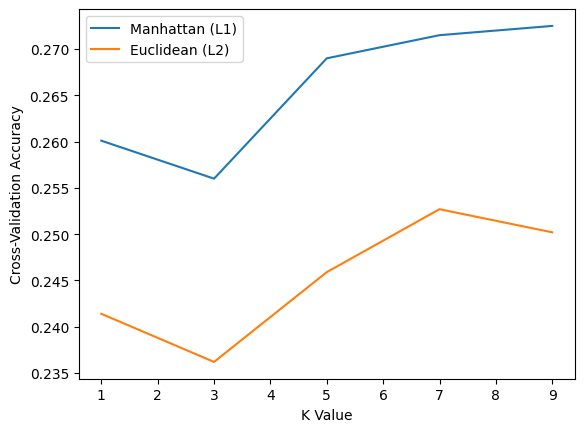

In [16]:
# Plot the results
plt.plot(k_values, manhattan_avg_accuracy_results, label='Manhattan (L1)')
plt.plot(k_values, euclidean_avg_accuracy_results, label='Euclidean (L2)')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

In [17]:
# Discussion:

# The code implementation successfully demonstrates the application of the k-NN algorithm for image classification on the CIFAR-10 dataset.
# The use of cross-validation ensures robust evaluation, while the visualization of results facilitates a clear understanding of the impact of different hyperparameters on the model's performance.
# The performance of Manhattan (L1) and Euclidean (L2) distances based on the average accuracy values obtained from the 5-fold cross-validation is around 28% and 25% sequentially. This model predicted correct image everytime on first prediction. However, later predictions are not correct.
# Images was converted to gray scale for faster processing.
# The code primarily relies on basic image preprocessing techniques, such as grayscale conversion and resizing. More advanced feature engineering methods, such as edge detection,
# texture extraction, or deep feature learning, could potentially improve the discriminative power of the model.
# Although the grayscale conversion reduces computational complexity, the 1D flattening of the images may lead to information loss.
# Generating additional training data through techniques could help improve the model's generalization and robustness, especially when dealing with limited datasets.

0it [00:00, ?it/s]

Originial Test Image 1: 9
Top 5 Predictions:
1: Class 9
2: Class 9
3: Class 5
4: Class 5
5: Class 4




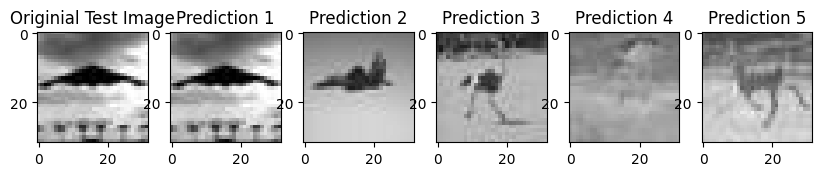

1it [00:00,  1.30it/s]

Originial Test Image 2: 6
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 1
4: Class 6
5: Class 2




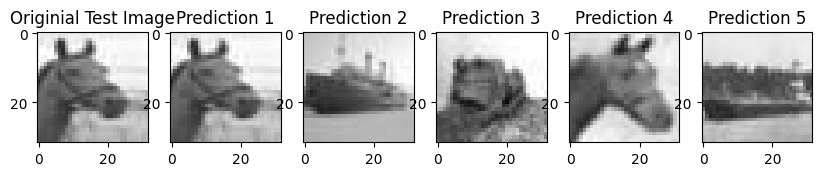

2it [00:01,  1.25it/s]

Originial Test Image 3: 4
Top 5 Predictions:
1: Class 4
2: Class 6
3: Class 3
4: Class 0
5: Class 5




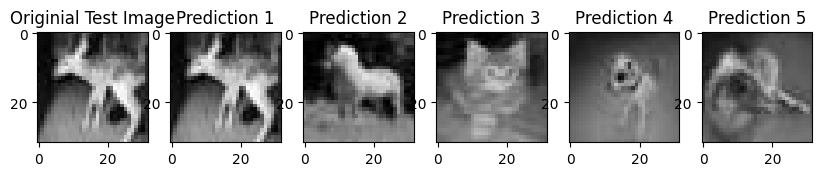

3it [00:02,  1.05it/s]

Originial Test Image 4: 0
Top 5 Predictions:
1: Class 0
2: Class 0
3: Class 5
4: Class 5
5: Class 9




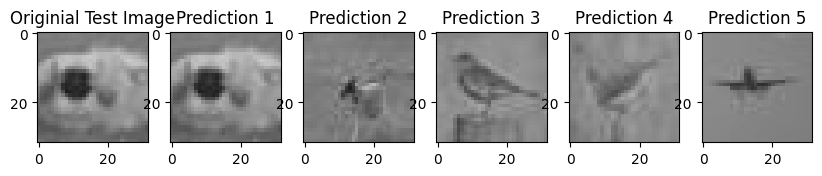

4it [00:04,  1.14s/it]

Originial Test Image 5: 3
Top 5 Predictions:
1: Class 3
2: Class 4
3: Class 4
4: Class 5
5: Class 4




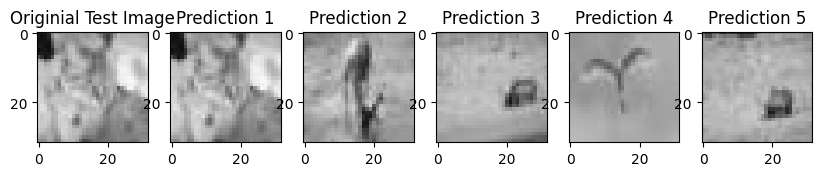

5it [00:05,  1.16s/it]

Originial Test Image 6: 7
Top 5 Predictions:
1: Class 7
2: Class 6
3: Class 7
4: Class 7
5: Class 1




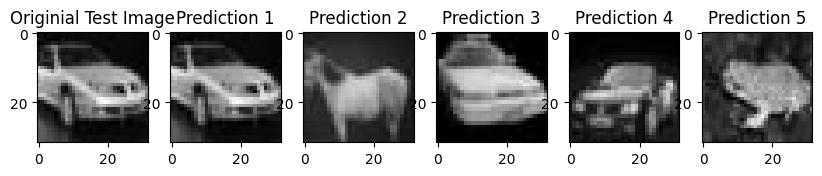

6it [00:06,  1.14s/it]

Originial Test Image 7: 5
Top 5 Predictions:
1: Class 5
2: Class 4
3: Class 9
4: Class 5
5: Class 9




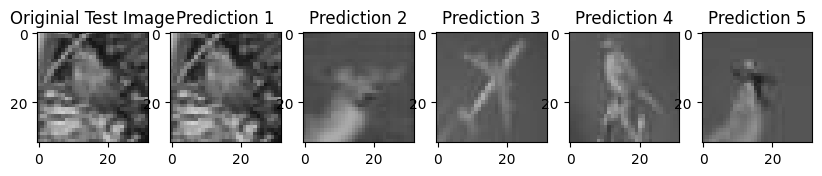

7it [00:07,  1.03s/it]

Originial Test Image 8: 8
Top 5 Predictions:
1: Class 8
2: Class 2
3: Class 0
4: Class 4
5: Class 1




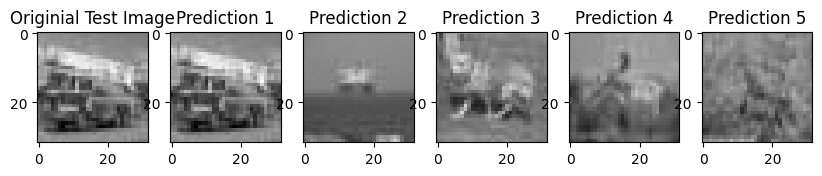

8it [00:08,  1.05it/s]

Originial Test Image 9: 8
Top 5 Predictions:
1: Class 8
2: Class 5
3: Class 6
4: Class 2
5: Class 3




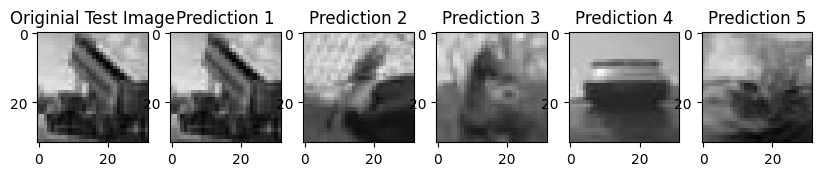

9it [00:09,  1.03it/s]

Originial Test Image 10: 3
Top 5 Predictions:
1: Class 3
2: Class 5
3: Class 0
4: Class 5
5: Class 1




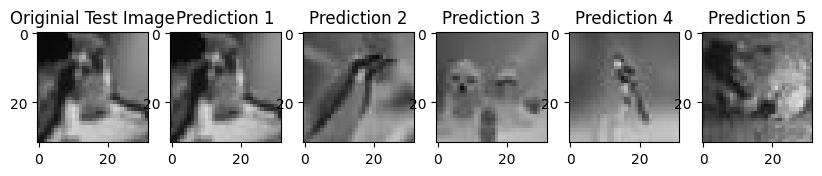

10it [00:09,  1.09it/s]

Originial Test Image 11: 8
Top 5 Predictions:
1: Class 8
2: Class 2
3: Class 3
4: Class 2
5: Class 1




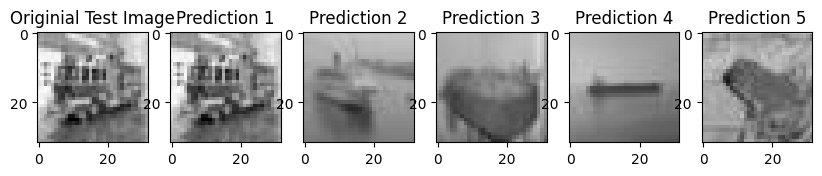

11it [00:10,  1.14it/s]

Originial Test Image 12: 9
Top 5 Predictions:
1: Class 9
2: Class 9
3: Class 9
4: Class 9
5: Class 9




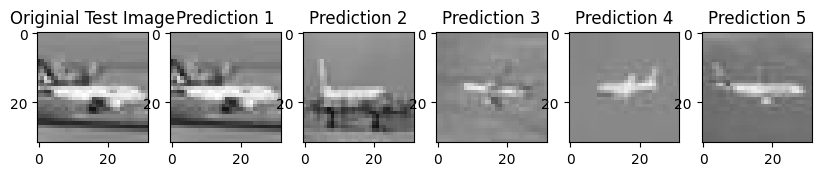

12it [00:11,  1.18it/s]

Originial Test Image 13: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 9
4: Class 1
5: Class 4




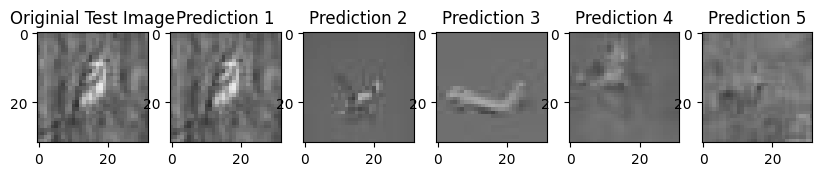

13it [00:12,  1.20it/s]

Originial Test Image 14: 9
Top 5 Predictions:
1: Class 9
2: Class 2
3: Class 5
4: Class 4
5: Class 2




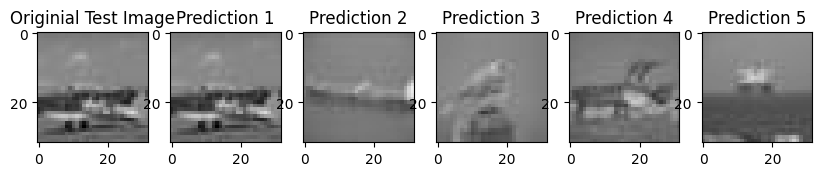

14it [00:13,  1.14it/s]

Originial Test Image 15: 3
Top 5 Predictions:
1: Class 3
2: Class 4
3: Class 9
4: Class 3
5: Class 4




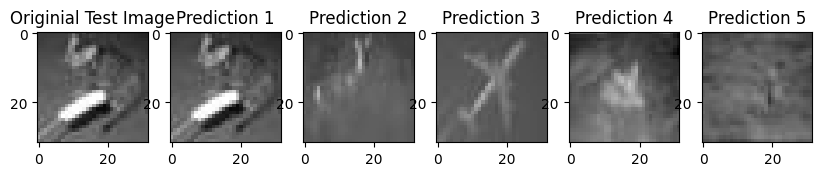

15it [00:13,  1.17it/s]

Originial Test Image 16: 8
Top 5 Predictions:
1: Class 8
2: Class 7
3: Class 1
4: Class 2
5: Class 2




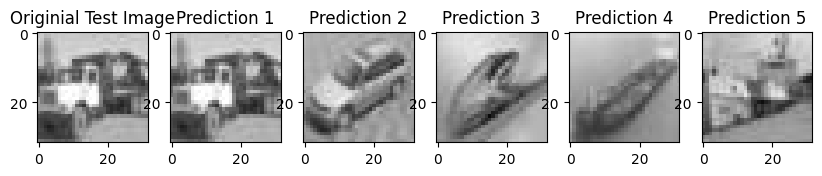

16it [00:14,  1.19it/s]

Originial Test Image 17: 0
Top 5 Predictions:
1: Class 0
2: Class 0
3: Class 4
4: Class 3
5: Class 5




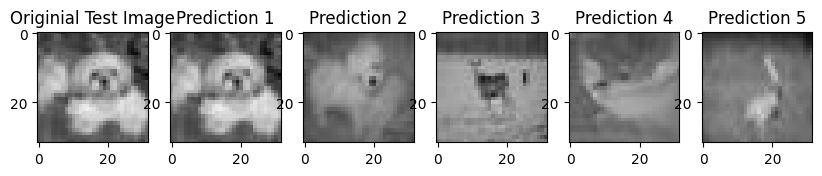

17it [00:15,  1.21it/s]

Originial Test Image 18: 6
Top 5 Predictions:
1: Class 6
2: Class 9
3: Class 9
4: Class 8
5: Class 4




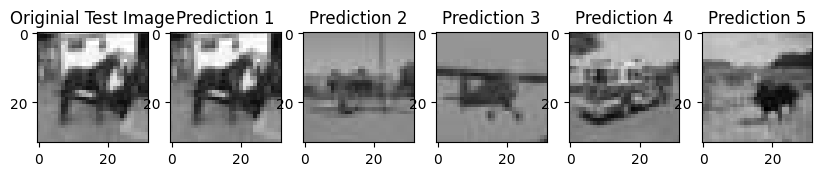

18it [00:16,  1.21it/s]

Originial Test Image 19: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 9
4: Class 3
5: Class 2




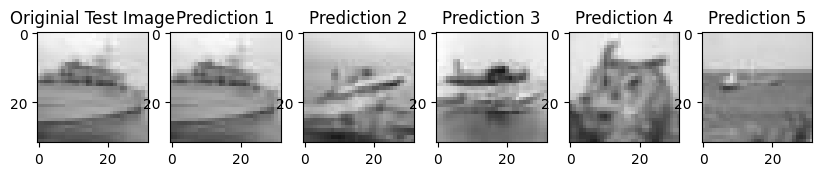

19it [00:17,  1.01s/it]

Originial Test Image 20: 3
Top 5 Predictions:
1: Class 3
2: Class 2
3: Class 6
4: Class 1
5: Class 4




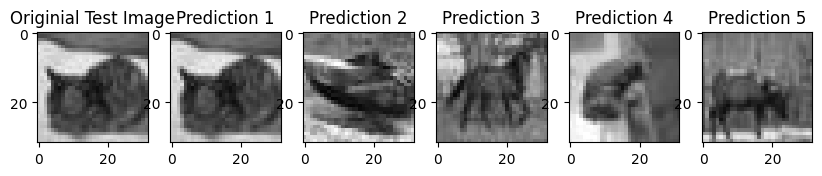

20it [00:19,  1.05s/it]

Originial Test Image 21: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 5
4: Class 5
5: Class 5




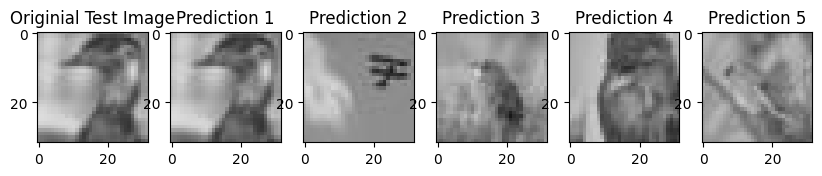

21it [00:20,  1.09s/it]

Originial Test Image 22: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 5
4: Class 4
5: Class 6




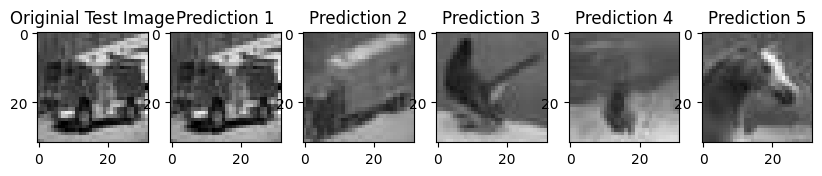

22it [00:21,  1.08s/it]

Originial Test Image 23: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 2
4: Class 5
5: Class 9




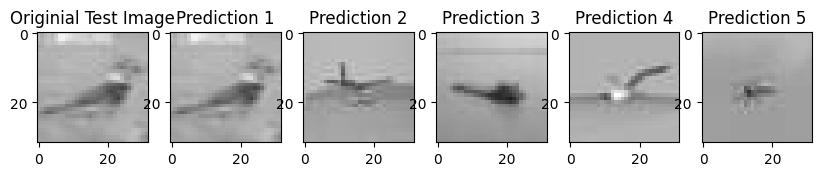

23it [00:22,  1.00it/s]

Originial Test Image 24: 5
Top 5 Predictions:
1: Class 5
2: Class 2
3: Class 9
4: Class 5
5: Class 5




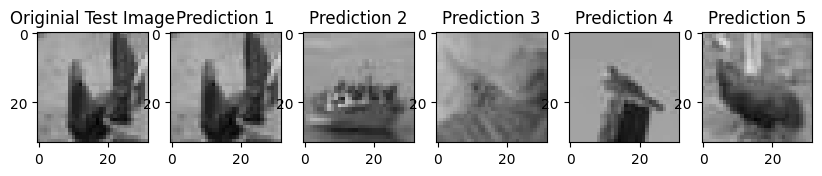

24it [00:22,  1.07it/s]

Originial Test Image 25: 3
Top 5 Predictions:
1: Class 3
2: Class 9
3: Class 5
4: Class 3
5: Class 4




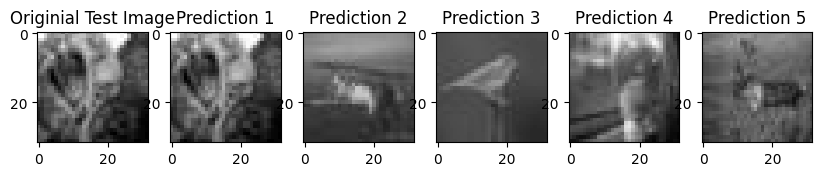

25it [00:23,  1.05it/s]

Originial Test Image 26: 4
Top 5 Predictions:
1: Class 4
2: Class 2
3: Class 5
4: Class 1
5: Class 2




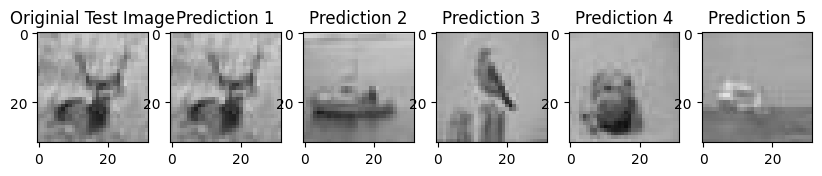

26it [00:24,  1.11it/s]

Originial Test Image 27: 3
Top 5 Predictions:
1: Class 3
2: Class 4
3: Class 4
4: Class 5
5: Class 1




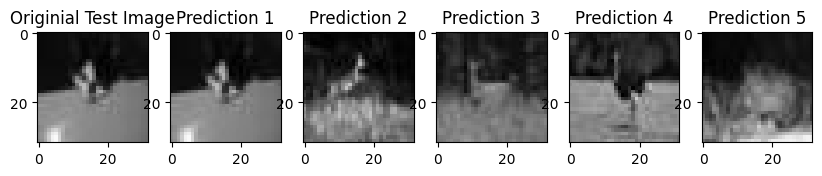

27it [00:25,  1.16it/s]

Originial Test Image 28: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 2
4: Class 2
5: Class 2




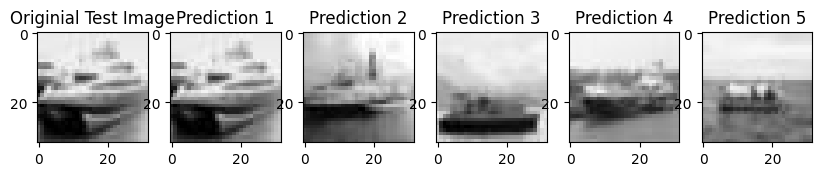

28it [00:26,  1.18it/s]

Originial Test Image 29: 1
Top 5 Predictions:
1: Class 1
2: Class 5
3: Class 5
4: Class 9
5: Class 0




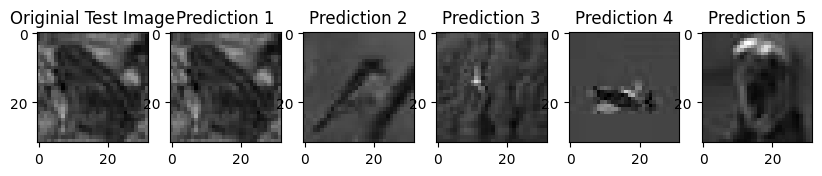

29it [00:27,  1.19it/s]

Originial Test Image 30: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 0
4: Class 2
5: Class 2




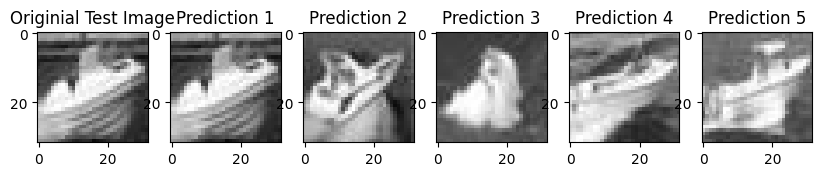

30it [00:27,  1.14it/s]

Originial Test Image 31: 1
Top 5 Predictions:
1: Class 1
2: Class 1
3: Class 1
4: Class 4
5: Class 2




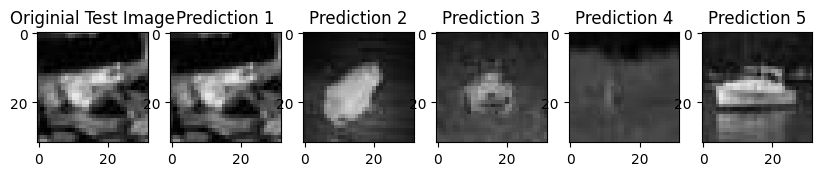

31it [00:28,  1.17it/s]

Originial Test Image 32: 4
Top 5 Predictions:
1: Class 4
2: Class 9
3: Class 9
4: Class 9
5: Class 9




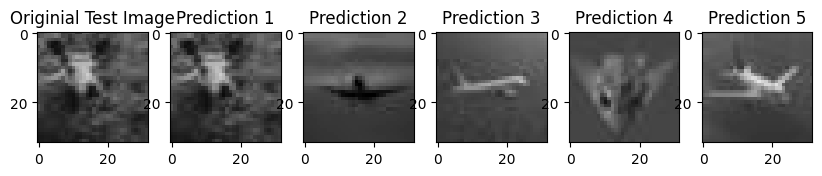

32it [00:29,  1.18it/s]

Originial Test Image 33: 3
Top 5 Predictions:
1: Class 3
2: Class 0
3: Class 4
4: Class 5
5: Class 1




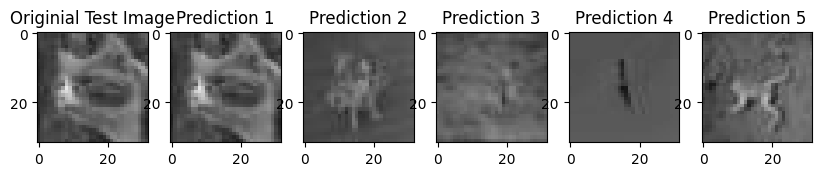

33it [00:30,  1.20it/s]

Originial Test Image 34: 6
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 9
4: Class 4
5: Class 2




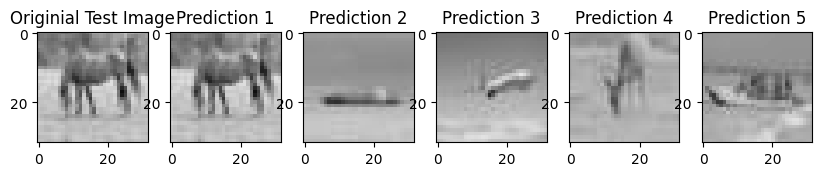

34it [00:31,  1.19it/s]

Originial Test Image 35: 4
Top 5 Predictions:
1: Class 4
2: Class 2
3: Class 2
4: Class 9
5: Class 2




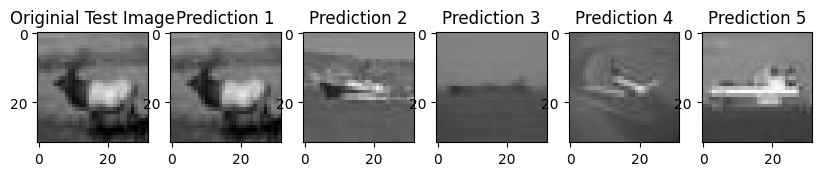

35it [00:32,  1.03s/it]

Originial Test Image 36: 0
Top 5 Predictions:
1: Class 0
2: Class 2
3: Class 3
4: Class 6
5: Class 9




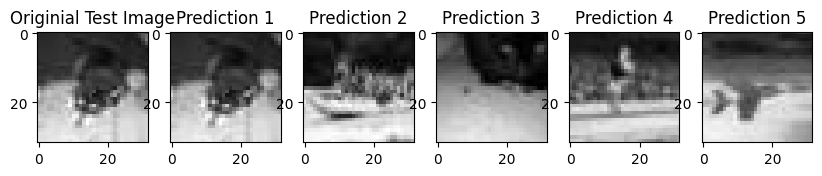

36it [00:33,  1.07s/it]

Originial Test Image 37: 6
Top 5 Predictions:
1: Class 6
2: Class 6
3: Class 1
4: Class 1
5: Class 3




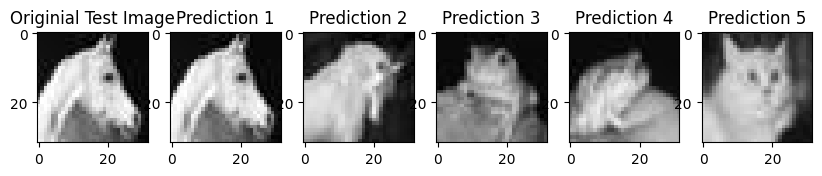

37it [00:35,  1.12s/it]

Originial Test Image 38: 9
Top 5 Predictions:
1: Class 9
2: Class 5
3: Class 2
4: Class 0
5: Class 4




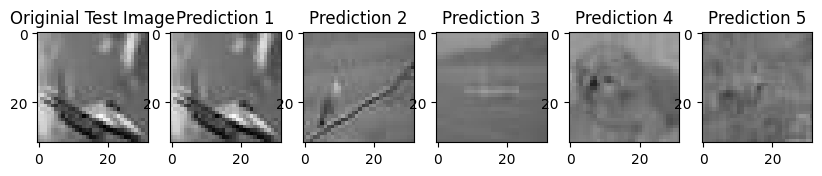

38it [00:36,  1.08s/it]

Originial Test Image 39: 2
Top 5 Predictions:
1: Class 2
2: Class 5
3: Class 2
4: Class 5
5: Class 9




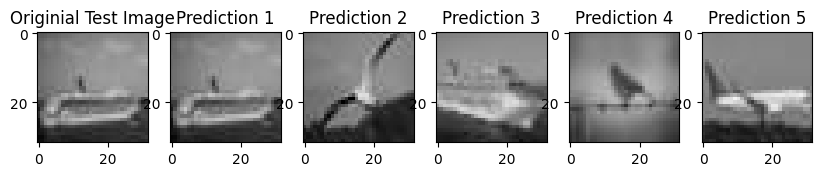

39it [00:36,  1.01it/s]

Originial Test Image 40: 8
Top 5 Predictions:
1: Class 8
2: Class 9
3: Class 8
4: Class 0
5: Class 3




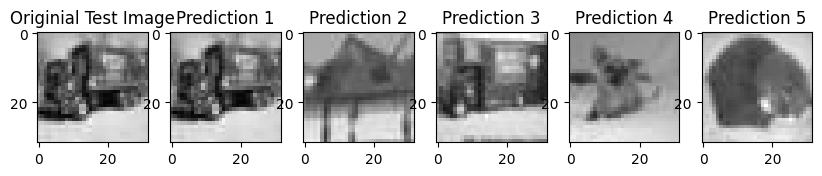

40it [00:37,  1.01it/s]

Originial Test Image 41: 0
Top 5 Predictions:
1: Class 0
2: Class 9
3: Class 6
4: Class 0
5: Class 1




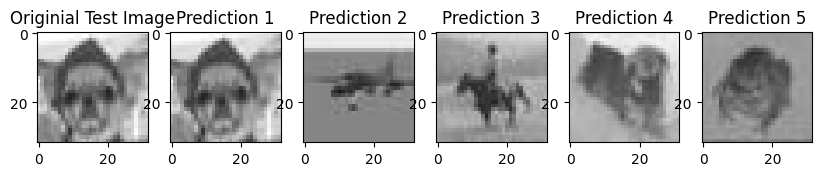

41it [00:38,  1.07it/s]

Originial Test Image 42: 8
Top 5 Predictions:
1: Class 8
2: Class 4
3: Class 2
4: Class 4
5: Class 2




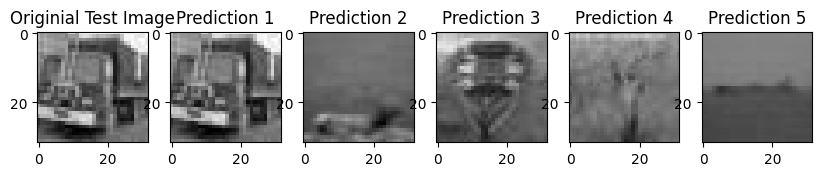

42it [00:39,  1.12it/s]

Originial Test Image 43: 7
Top 5 Predictions:
1: Class 7
2: Class 7
3: Class 9
4: Class 0
5: Class 3




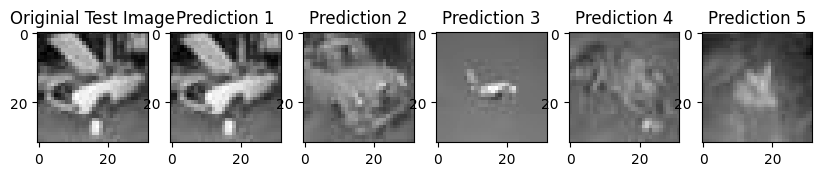

43it [00:40,  1.17it/s]

Originial Test Image 44: 5
Top 5 Predictions:
1: Class 5
2: Class 6
3: Class 0
4: Class 4
5: Class 8




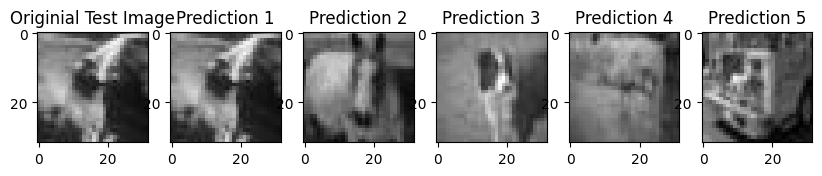

44it [00:41,  1.20it/s]

Originial Test Image 45: 0
Top 5 Predictions:
1: Class 0
2: Class 2
3: Class 9
4: Class 2
5: Class 9




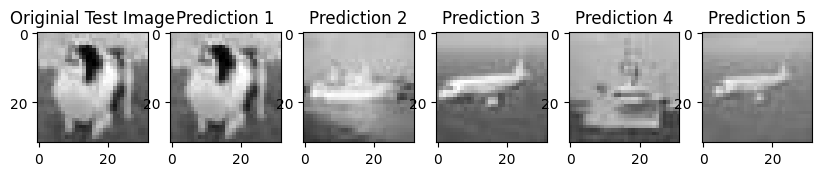

45it [00:41,  1.21it/s]

Originial Test Image 46: 4
Top 5 Predictions:
1: Class 4
2: Class 9
3: Class 9
4: Class 4
5: Class 5




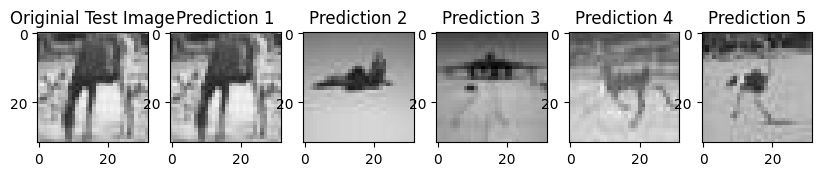

46it [00:42,  1.13it/s]

Originial Test Image 47: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 9
4: Class 2
5: Class 2




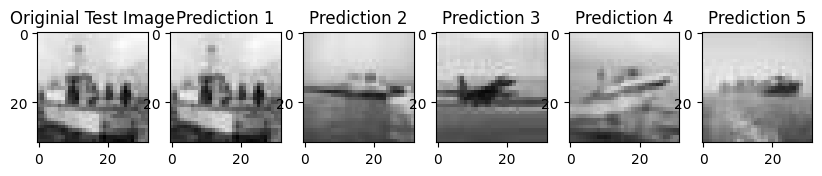

47it [00:43,  1.16it/s]

Originial Test Image 48: 9
Top 5 Predictions:
1: Class 9
2: Class 1
3: Class 9
4: Class 5
5: Class 9




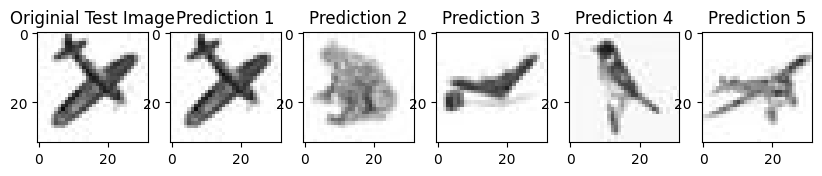

48it [00:44,  1.18it/s]

Originial Test Image 49: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 9
4: Class 9
5: Class 5




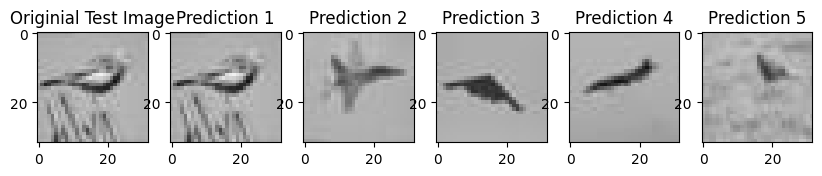

49it [00:45,  1.20it/s]

Originial Test Image 50: 9
Top 5 Predictions:
1: Class 9
2: Class 5
3: Class 2
4: Class 2
5: Class 2




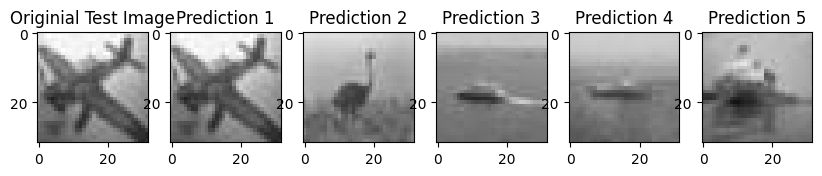

50it [00:46,  1.11it/s]

Originial Test Image 51: 1
Top 5 Predictions:
1: Class 1
2: Class 5
3: Class 4
4: Class 0
5: Class 9




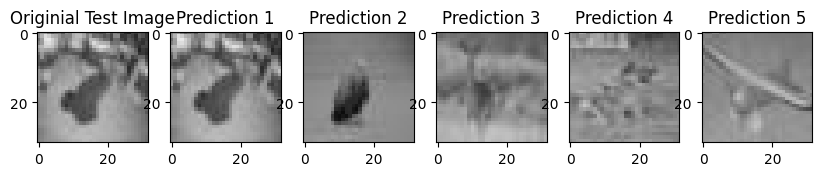

51it [00:47,  1.07s/it]

Originial Test Image 52: 4
Top 5 Predictions:
1: Class 4
2: Class 9
3: Class 9
4: Class 5
5: Class 9




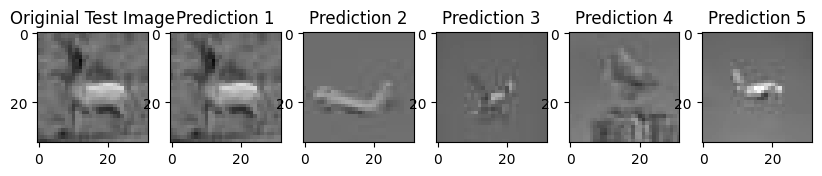

52it [00:49,  1.12s/it]

Originial Test Image 53: 9
Top 5 Predictions:
1: Class 9
2: Class 5
3: Class 9
4: Class 5
5: Class 9




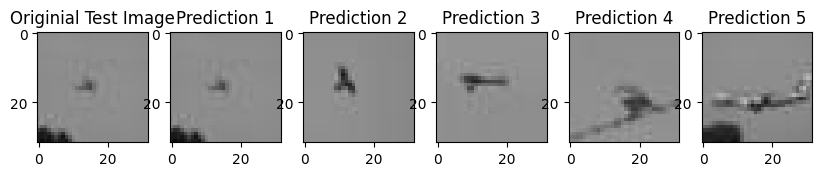

53it [00:50,  1.15s/it]

Originial Test Image 54: 1
Top 5 Predictions:
1: Class 1
2: Class 9
3: Class 4
4: Class 9
5: Class 4




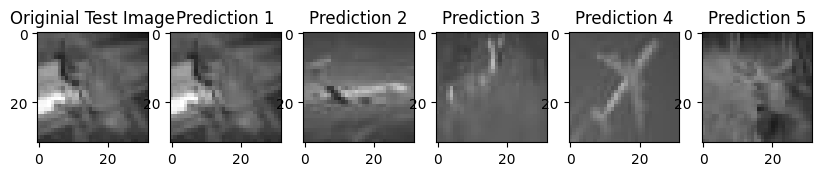

54it [00:51,  1.06s/it]

Originial Test Image 55: 7
Top 5 Predictions:
1: Class 7
2: Class 7
3: Class 1
4: Class 7
5: Class 7




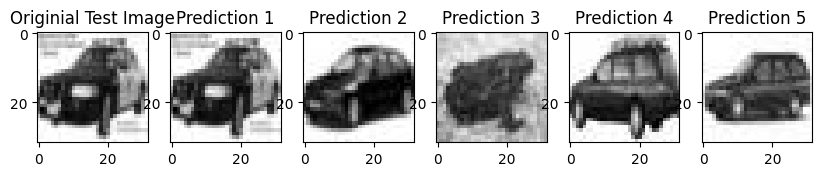

55it [00:51,  1.01it/s]

Originial Test Image 56: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 2
4: Class 8
5: Class 6




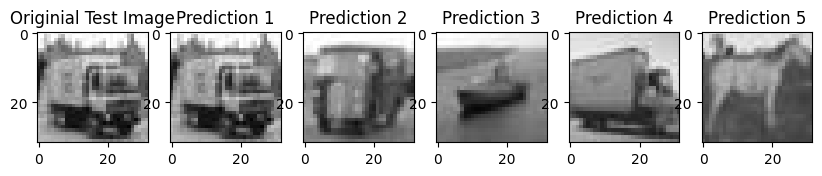

56it [00:52,  1.00it/s]

Originial Test Image 57: 9
Top 5 Predictions:
1: Class 9
2: Class 9
3: Class 9
4: Class 5
5: Class 9




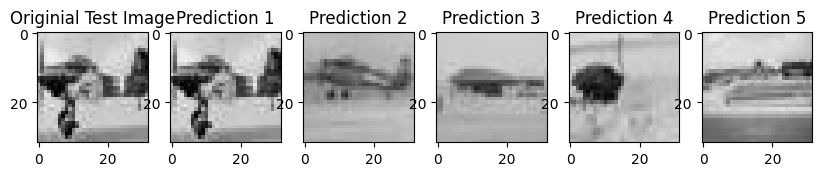

57it [00:53,  1.06it/s]

Originial Test Image 58: 9
Top 5 Predictions:
1: Class 9
2: Class 9
3: Class 9
4: Class 5
5: Class 9




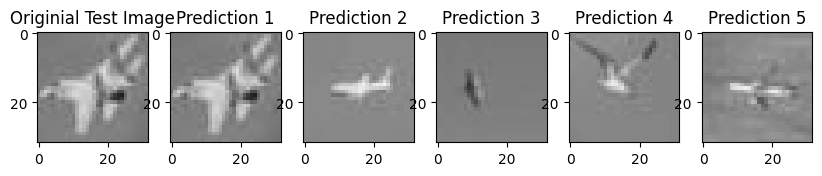

58it [00:54,  1.11it/s]

Originial Test Image 59: 1
Top 5 Predictions:
1: Class 1
2: Class 1
3: Class 9
4: Class 3
5: Class 5




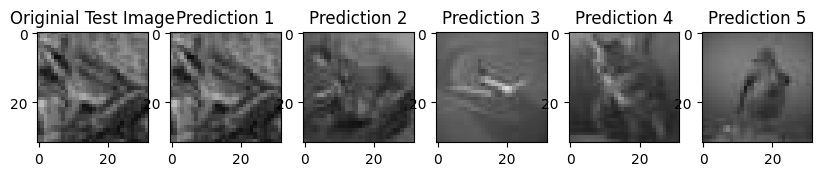

59it [00:55,  1.14it/s]

Originial Test Image 60: 9
Top 5 Predictions:
1: Class 9
2: Class 2
3: Class 9
4: Class 4
5: Class 1




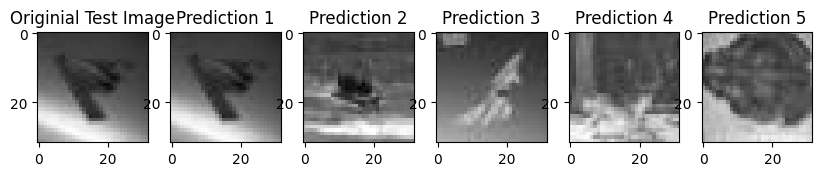

60it [00:56,  1.16it/s]

Originial Test Image 61: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 8
4: Class 5
5: Class 5




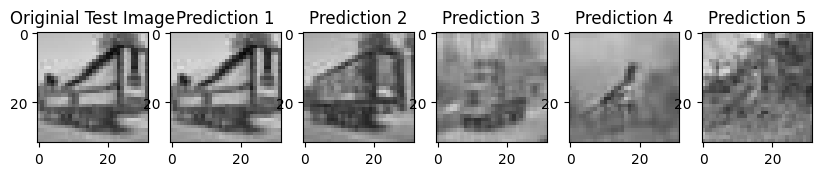

61it [00:57,  1.10it/s]

Originial Test Image 62: 3
Top 5 Predictions:
1: Class 3
2: Class 1
3: Class 1
4: Class 5
5: Class 3




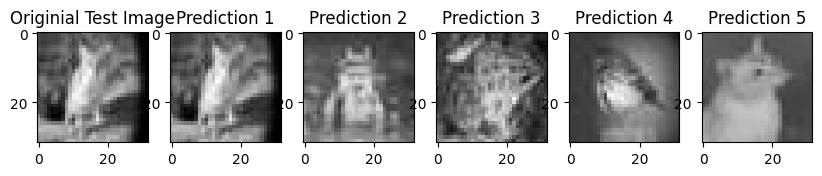

62it [00:58,  1.15it/s]

Originial Test Image 63: 0
Top 5 Predictions:
1: Class 0
2: Class 4
3: Class 4
4: Class 9
5: Class 4




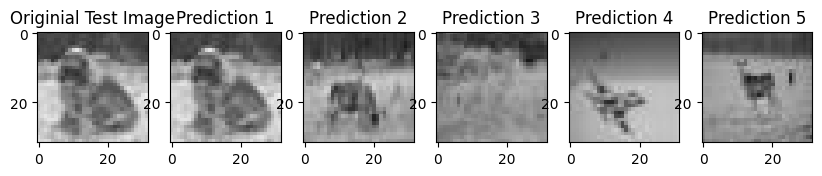

63it [00:58,  1.18it/s]

Originial Test Image 64: 9
Top 5 Predictions:
1: Class 9
2: Class 4
3: Class 9
4: Class 9
5: Class 5




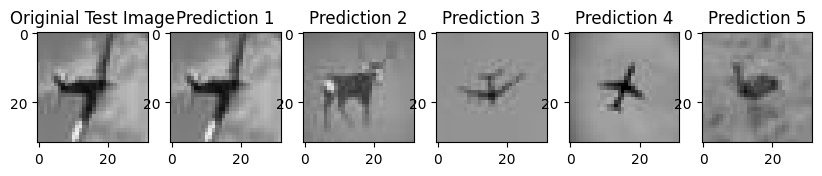

64it [00:59,  1.19it/s]

Originial Test Image 65: 7
Top 5 Predictions:
1: Class 7
2: Class 2
3: Class 3
4: Class 9
5: Class 6




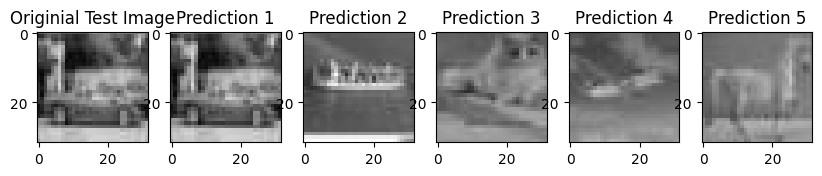

65it [01:00,  1.16it/s]

Originial Test Image 66: 6
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 2
4: Class 1
5: Class 2




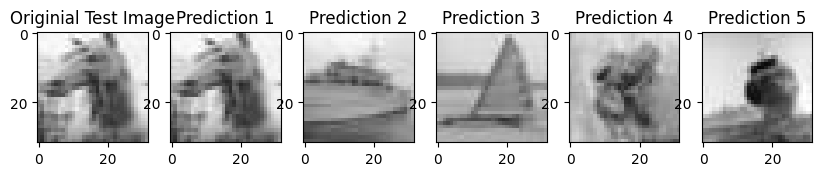

66it [01:01,  1.03s/it]

Originial Test Image 67: 6
Top 5 Predictions:
1: Class 6
2: Class 1
3: Class 0
4: Class 0
5: Class 9




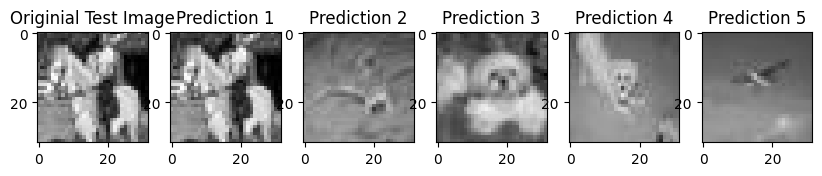

67it [01:03,  1.08s/it]

Originial Test Image 68: 6
Top 5 Predictions:
1: Class 6
2: Class 9
3: Class 2
4: Class 7
5: Class 2




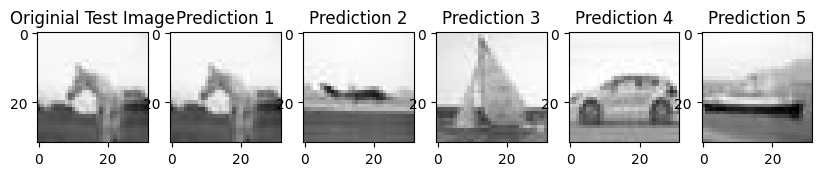

68it [01:04,  1.12s/it]

Originial Test Image 69: 1
Top 5 Predictions:
1: Class 1
2: Class 4
3: Class 4
4: Class 4
5: Class 3




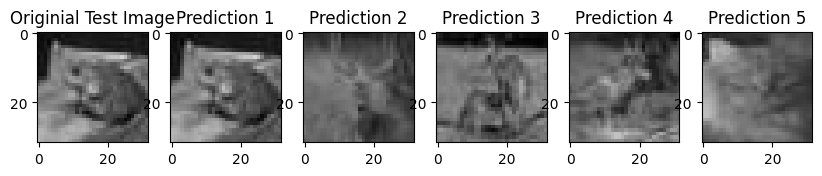

69it [01:05,  1.11s/it]

Originial Test Image 70: 0
Top 5 Predictions:
1: Class 0
2: Class 3
3: Class 1
4: Class 9
5: Class 4




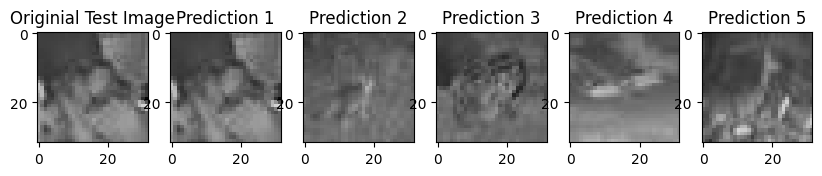

70it [01:06,  1.02s/it]

Originial Test Image 71: 9
Top 5 Predictions:
1: Class 9
2: Class 4
3: Class 9
4: Class 3
5: Class 5




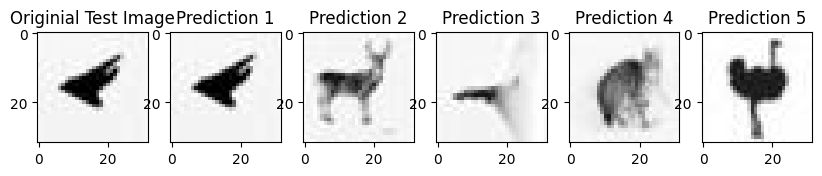

71it [01:07,  1.03it/s]

Originial Test Image 72: 6
Top 5 Predictions:
1: Class 6
2: Class 8
3: Class 7
4: Class 7
5: Class 9




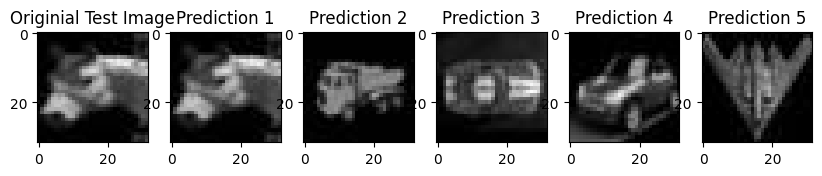

72it [01:08,  1.01s/it]

Originial Test Image 73: 7
Top 5 Predictions:
1: Class 7
2: Class 9
3: Class 9
4: Class 2
5: Class 9




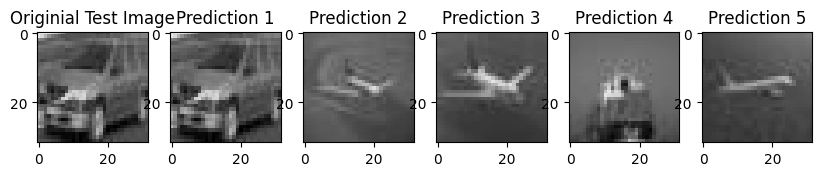

73it [01:09,  1.05it/s]

Originial Test Image 74: 6
Top 5 Predictions:
1: Class 6
2: Class 4
3: Class 9
4: Class 5
5: Class 9




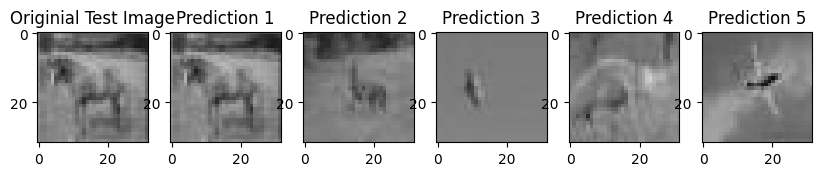

74it [01:09,  1.09it/s]

Originial Test Image 75: 9
Top 5 Predictions:
1: Class 9
2: Class 9
3: Class 4
4: Class 7
5: Class 2




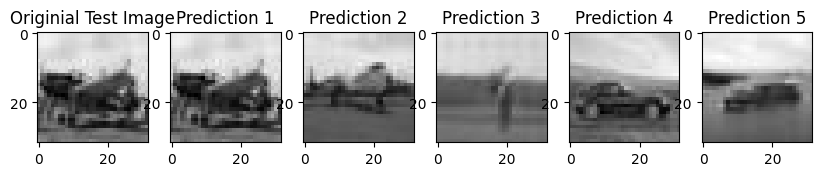

75it [01:10,  1.13it/s]

Originial Test Image 76: 1
Top 5 Predictions:
1: Class 1
2: Class 2
3: Class 8
4: Class 5
5: Class 0




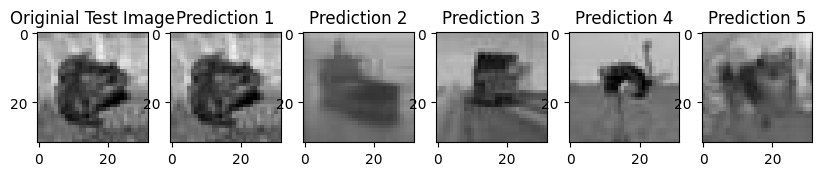

76it [01:11,  1.15it/s]

Originial Test Image 77: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 7
4: Class 9
5: Class 2




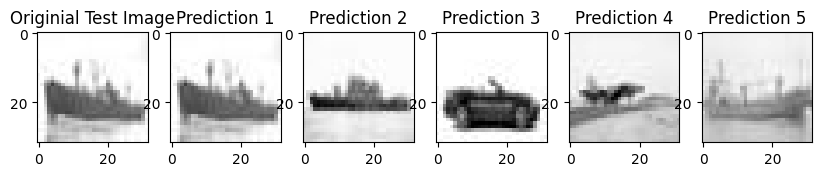

77it [01:12,  1.09it/s]

Originial Test Image 78: 7
Top 5 Predictions:
1: Class 7
2: Class 1
3: Class 7
4: Class 2
5: Class 7




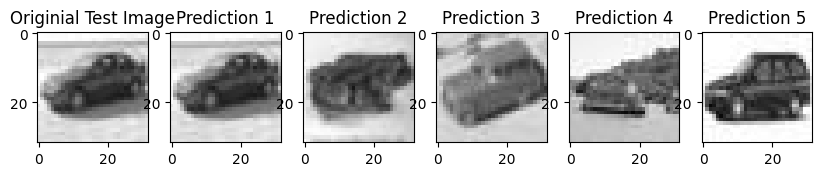

78it [01:13,  1.12it/s]

Originial Test Image 79: 6
Top 5 Predictions:
1: Class 6
2: Class 4
3: Class 8
4: Class 0
5: Class 5




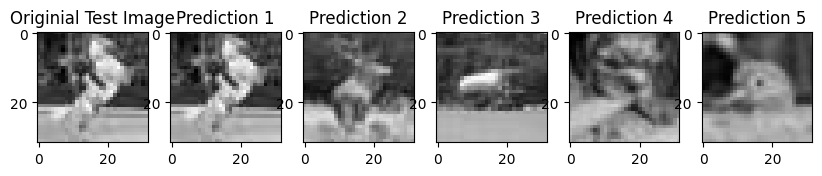

79it [01:14,  1.15it/s]

Originial Test Image 80: 1
Top 5 Predictions:
1: Class 1
2: Class 1
3: Class 4
4: Class 1
5: Class 0




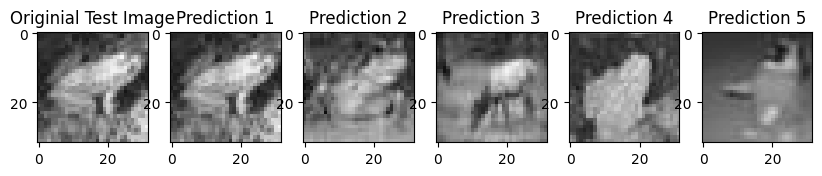

80it [01:15,  1.16it/s]

Originial Test Image 81: 2
Top 5 Predictions:
1: Class 2
2: Class 8
3: Class 9
4: Class 2
5: Class 9




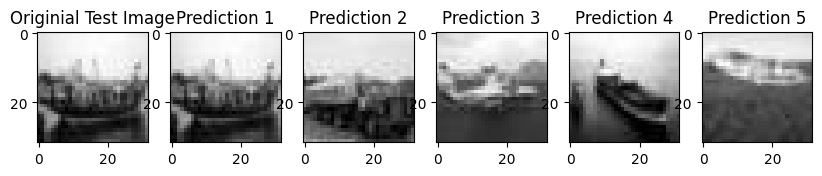

81it [01:16,  1.06it/s]

Originial Test Image 82: 0
Top 5 Predictions:
1: Class 0
2: Class 4
3: Class 6
4: Class 2
5: Class 2




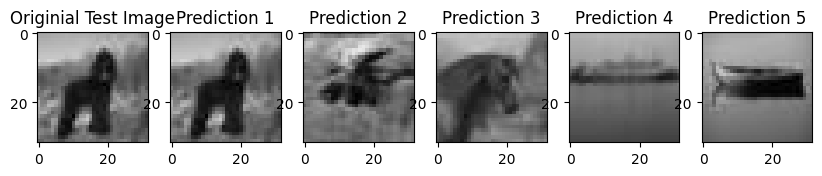

82it [01:17,  1.07s/it]

Originial Test Image 83: 4
Top 5 Predictions:
1: Class 4
2: Class 3
3: Class 5
4: Class 5
5: Class 3




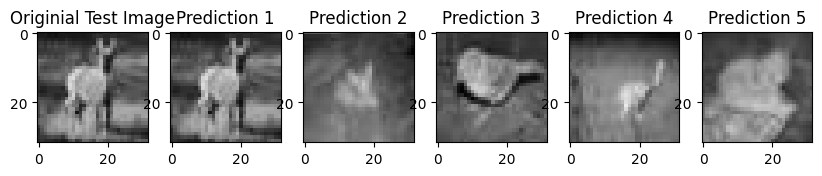

83it [01:18,  1.11s/it]

Originial Test Image 84: 9
Top 5 Predictions:
1: Class 9
2: Class 2
3: Class 2
4: Class 9
5: Class 4




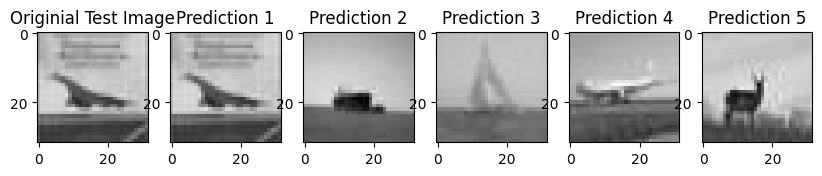

84it [01:20,  1.15s/it]

Originial Test Image 85: 5
Top 5 Predictions:
1: Class 5
2: Class 5
3: Class 5
4: Class 4
5: Class 9




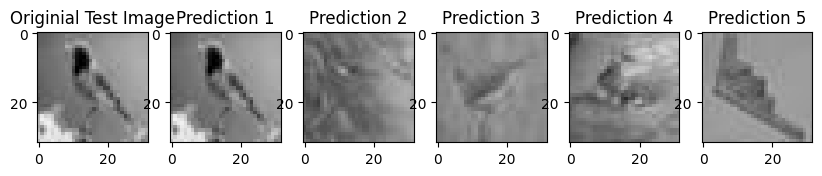

85it [01:20,  1.05s/it]

Originial Test Image 86: 7
Top 5 Predictions:
1: Class 7
2: Class 6
3: Class 1
4: Class 0
5: Class 0




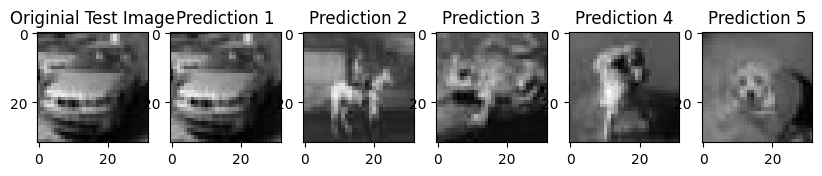

86it [01:21,  1.01it/s]

Originial Test Image 87: 8
Top 5 Predictions:
1: Class 8
2: Class 2
3: Class 2
4: Class 2
5: Class 4




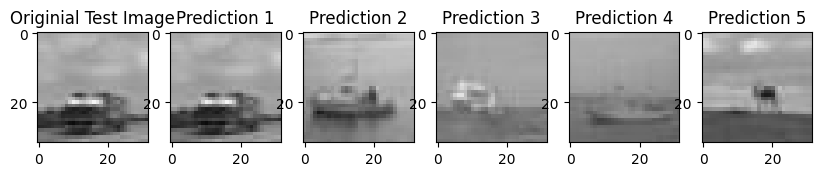

87it [01:22,  1.00s/it]

Originial Test Image 88: 0
Top 5 Predictions:
1: Class 0
2: Class 5
3: Class 3
4: Class 6
5: Class 3




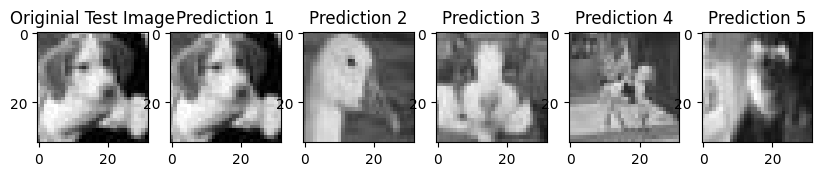

88it [01:23,  1.05it/s]

Originial Test Image 89: 3
Top 5 Predictions:
1: Class 3
2: Class 6
3: Class 1
4: Class 9
5: Class 5




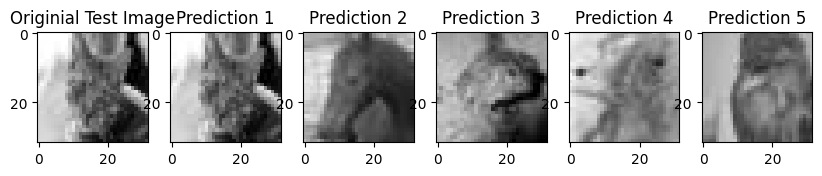

89it [01:24,  1.09it/s]

Originial Test Image 90: 3
Top 5 Predictions:
1: Class 3
2: Class 4
3: Class 0
4: Class 5
5: Class 9




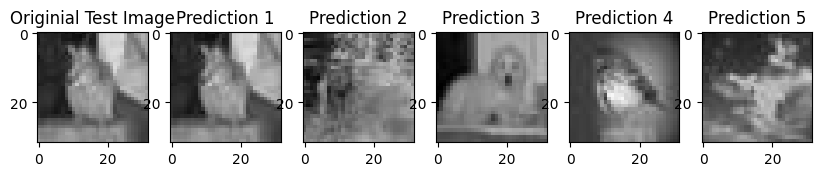

90it [01:25,  1.14it/s]

Originial Test Image 91: 7
Top 5 Predictions:
1: Class 7
2: Class 2
3: Class 2
4: Class 2
5: Class 5




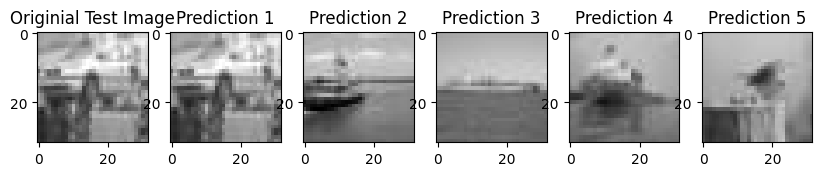

91it [01:26,  1.15it/s]

Originial Test Image 92: 1
Top 5 Predictions:
1: Class 1
2: Class 5
3: Class 3
4: Class 4
5: Class 5




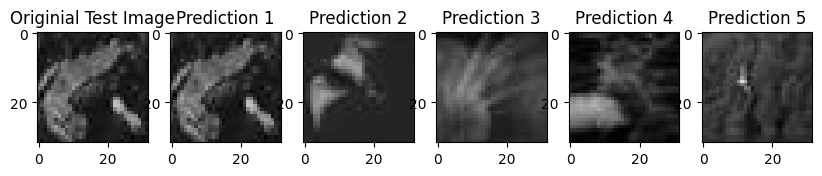

92it [01:26,  1.16it/s]

Originial Test Image 93: 5
Top 5 Predictions:
1: Class 5
2: Class 0
3: Class 0
4: Class 6
5: Class 4




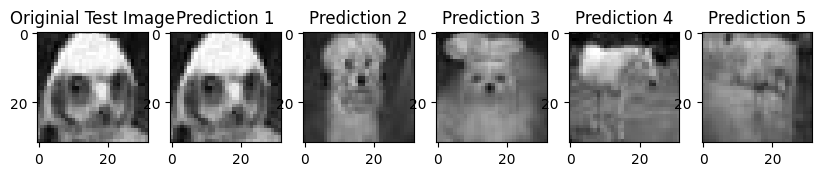

93it [01:27,  1.09it/s]

Originial Test Image 94: 5
Top 5 Predictions:
1: Class 5
2: Class 4
3: Class 4
4: Class 5
5: Class 4




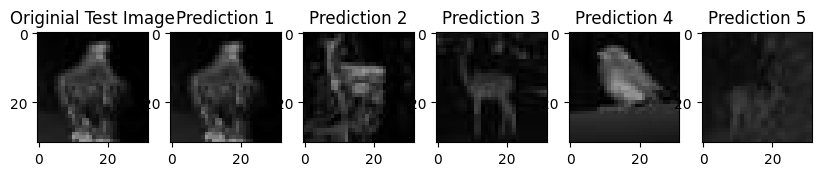

94it [01:28,  1.13it/s]

Originial Test Image 95: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 2
4: Class 7
5: Class 8




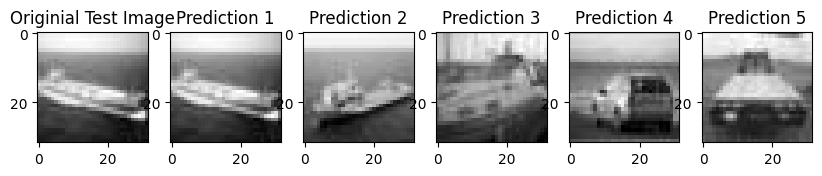

95it [01:29,  1.16it/s]

Originial Test Image 96: 8
Top 5 Predictions:
1: Class 8
2: Class 5
3: Class 4
4: Class 4
5: Class 4




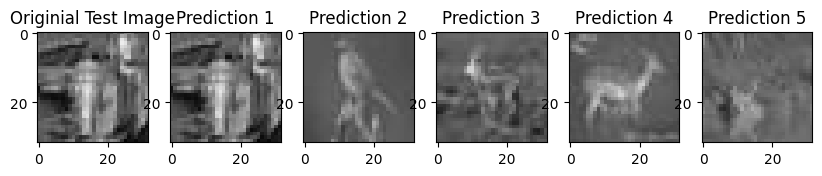

96it [01:30,  1.14it/s]

Originial Test Image 97: 8
Top 5 Predictions:
1: Class 8
2: Class 3
3: Class 7
4: Class 8
5: Class 8




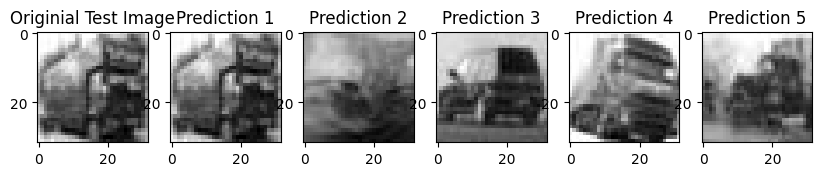

97it [01:31,  1.00it/s]

Originial Test Image 98: 0
Top 5 Predictions:
1: Class 0
2: Class 0
3: Class 3
4: Class 8
5: Class 5




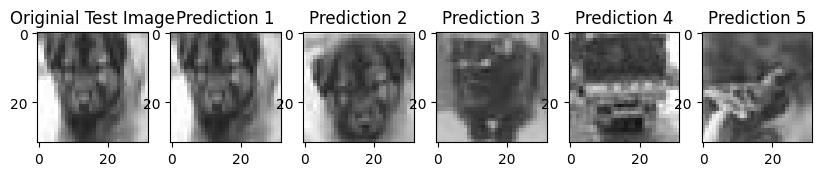

98it [01:33,  1.14s/it]

Originial Test Image 99: 8
Top 5 Predictions:
1: Class 8
2: Class 4
3: Class 2
4: Class 9
5: Class 9




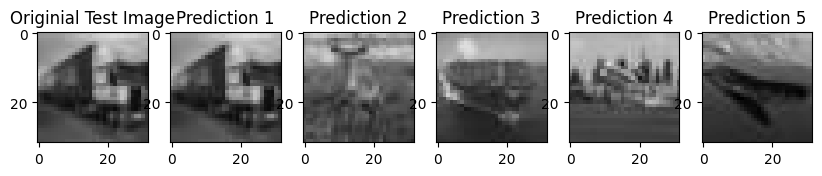

99it [01:34,  1.18s/it]

Originial Test Image 100: 2
Top 5 Predictions:
1: Class 2
2: Class 4
3: Class 2
4: Class 2
5: Class 5




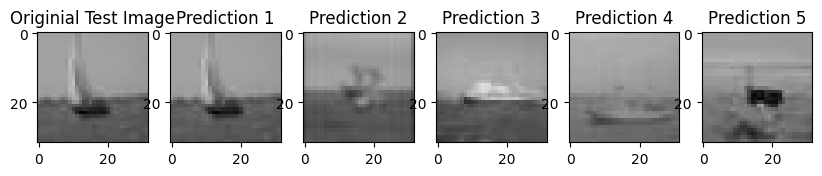

100it [01:35,  1.13s/it]

Originial Test Image 101: 3
Top 5 Predictions:
1: Class 3
2: Class 5
3: Class 9
4: Class 1
5: Class 9




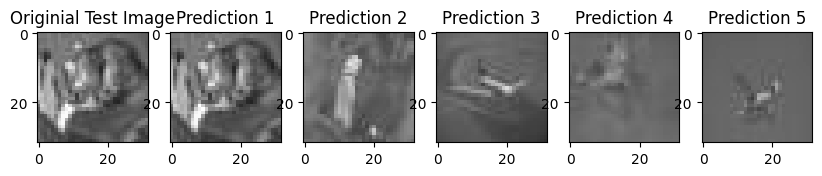

101it [01:36,  1.04s/it]

Originial Test Image 102: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 2
4: Class 2
5: Class 9




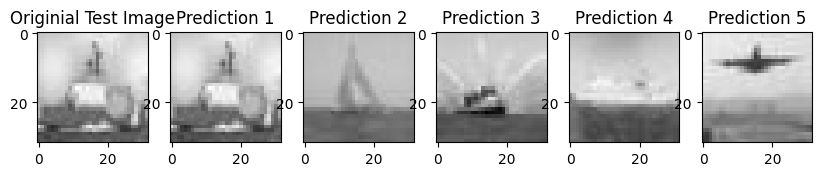

102it [01:37,  1.02it/s]

Originial Test Image 103: 6
Top 5 Predictions:
1: Class 6
2: Class 9
3: Class 9
4: Class 5
5: Class 9




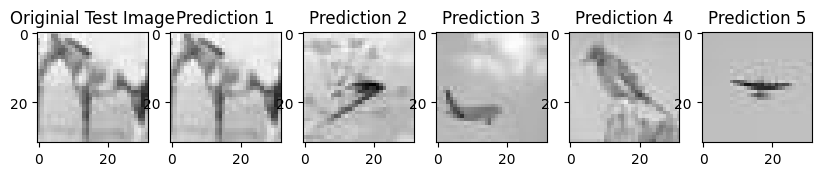

103it [01:38,  1.01it/s]

Originial Test Image 104: 5
Top 5 Predictions:
1: Class 5
2: Class 3
3: Class 4
4: Class 2
5: Class 9




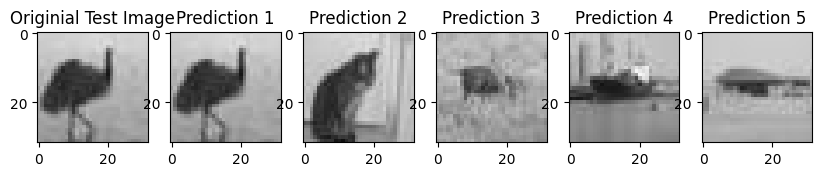

104it [01:38,  1.07it/s]

Originial Test Image 105: 6
Top 5 Predictions:
1: Class 6
2: Class 9
3: Class 1
4: Class 9
5: Class 2




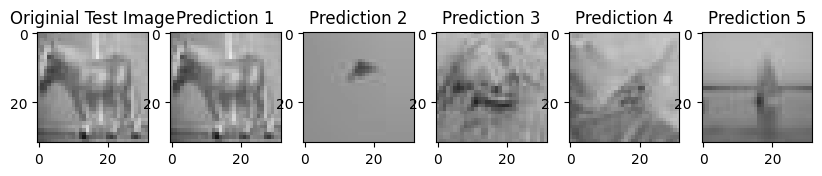

105it [01:39,  1.11it/s]

Originial Test Image 106: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 4
4: Class 2
5: Class 2




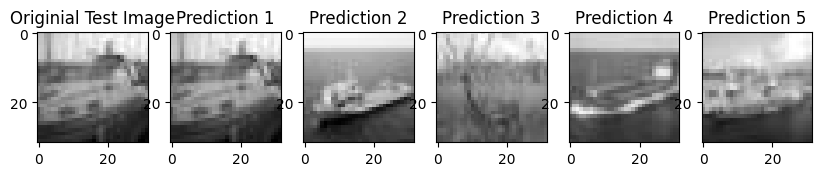

106it [01:40,  1.14it/s]

Originial Test Image 107: 4
Top 5 Predictions:
1: Class 4
2: Class 5
3: Class 0
4: Class 5
5: Class 3




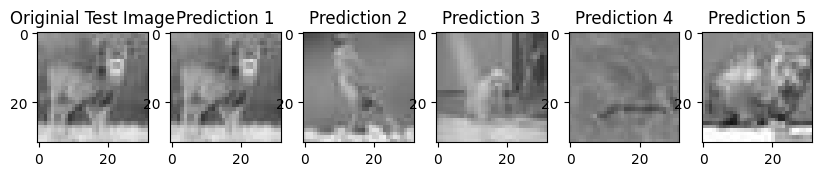

107it [01:41,  1.16it/s]

Originial Test Image 108: 6
Top 5 Predictions:
1: Class 6
2: Class 4
3: Class 4
4: Class 5
5: Class 9




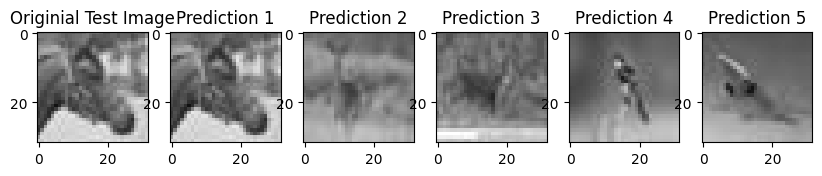

108it [01:42,  1.09it/s]

Originial Test Image 109: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 1
4: Class 1
5: Class 4




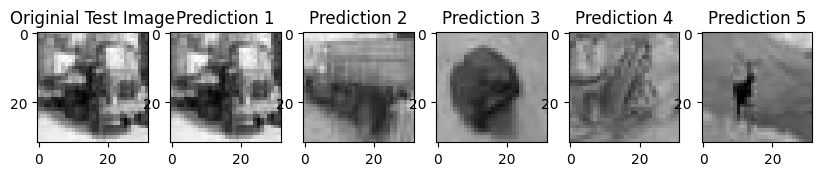

109it [01:43,  1.13it/s]

Originial Test Image 110: 7
Top 5 Predictions:
1: Class 7
2: Class 5
3: Class 1
4: Class 0
5: Class 7




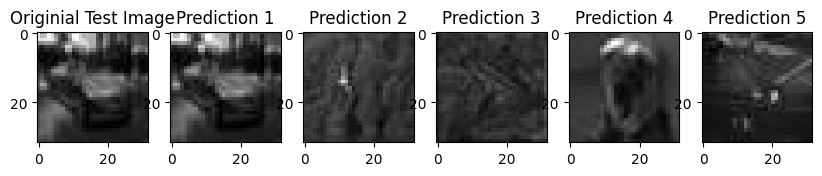

110it [01:44,  1.15it/s]

Originial Test Image 111: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 4
4: Class 5
5: Class 9




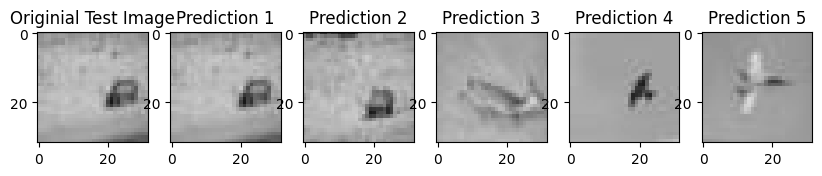

111it [01:44,  1.17it/s]

Originial Test Image 112: 4
Top 5 Predictions:
1: Class 4
2: Class 2
3: Class 2
4: Class 2
5: Class 9




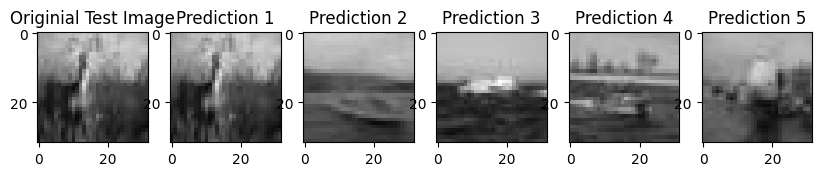

112it [01:46,  1.06it/s]

Originial Test Image 113: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 5
4: Class 5
5: Class 3




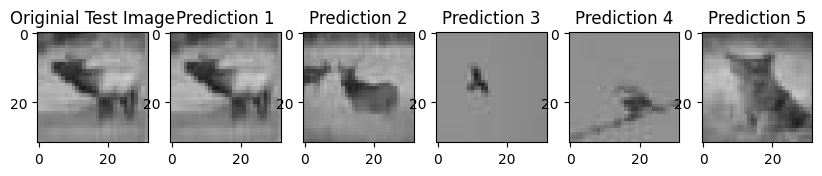

113it [01:47,  1.03s/it]

Originial Test Image 114: 0
Top 5 Predictions:
1: Class 0
2: Class 9
3: Class 9
4: Class 5
5: Class 2




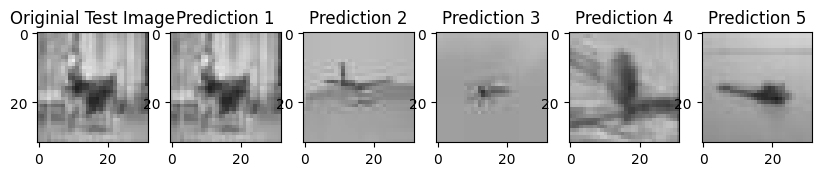

114it [01:48,  1.16s/it]

Originial Test Image 115: 1
Top 5 Predictions:
1: Class 1
2: Class 1
3: Class 1
4: Class 5
5: Class 5




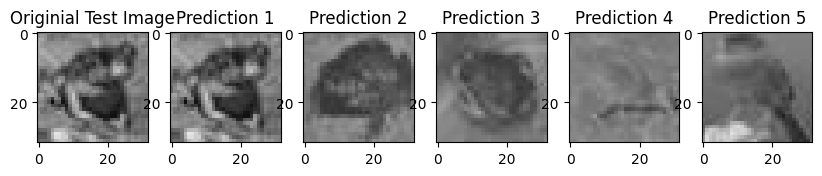

115it [01:50,  1.17s/it]

Originial Test Image 116: 6
Top 5 Predictions:
1: Class 6
2: Class 6
3: Class 1
4: Class 6
5: Class 6




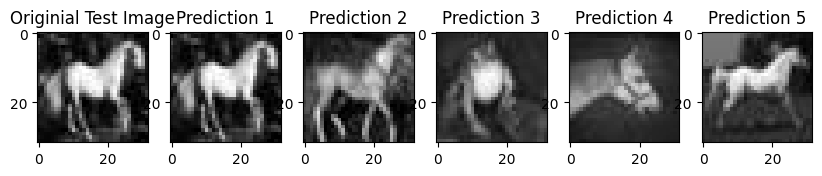

116it [01:50,  1.07s/it]

Originial Test Image 117: 1
Top 5 Predictions:
1: Class 1
2: Class 3
3: Class 5
4: Class 3
5: Class 1




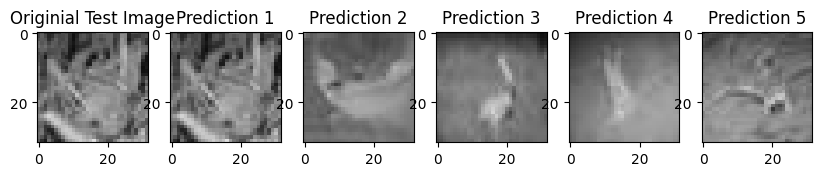

117it [01:51,  1.00it/s]

Originial Test Image 118: 7
Top 5 Predictions:
1: Class 7
2: Class 4
3: Class 1
4: Class 5
5: Class 1




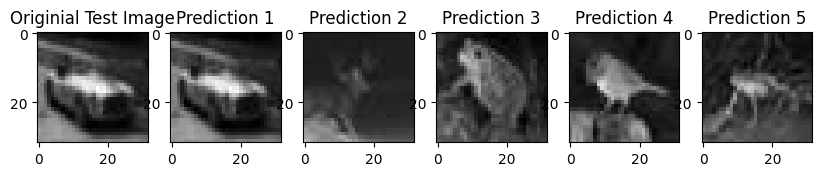

118it [01:52,  1.06it/s]

Originial Test Image 119: 7
Top 5 Predictions:
1: Class 7
2: Class 7
3: Class 7
4: Class 9
5: Class 7




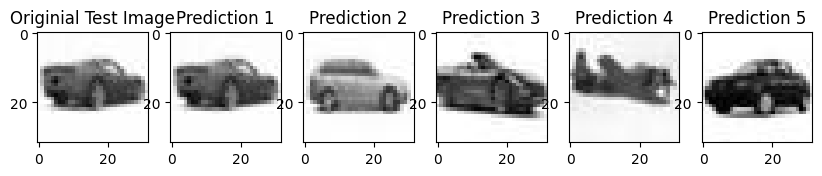

119it [01:53,  1.03it/s]

Originial Test Image 120: 1
Top 5 Predictions:
1: Class 1
2: Class 1
3: Class 1
4: Class 5
5: Class 5




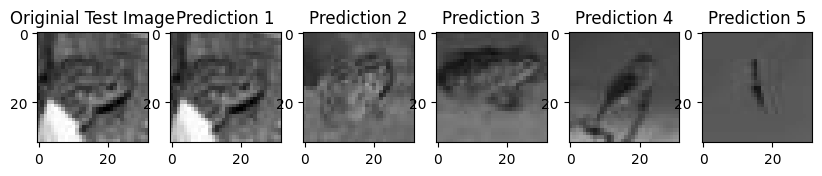

120it [01:54,  1.07it/s]

Originial Test Image 121: 7
Top 5 Predictions:
1: Class 7
2: Class 9
3: Class 4
4: Class 9
5: Class 2




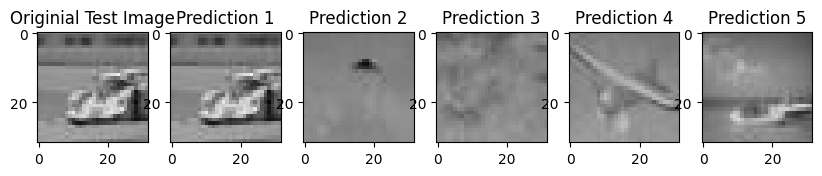

121it [01:55,  1.11it/s]

Originial Test Image 122: 4
Top 5 Predictions:
1: Class 4
2: Class 5
3: Class 4
4: Class 9
5: Class 5




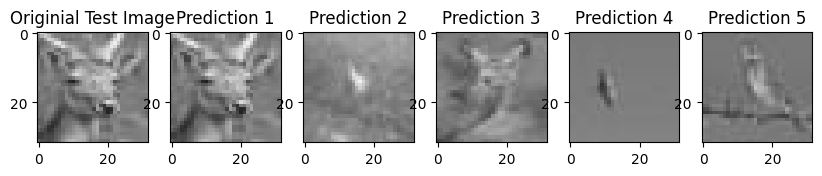

122it [01:56,  1.13it/s]

Originial Test Image 123: 1
Top 5 Predictions:
1: Class 1
2: Class 5
3: Class 4
4: Class 1
5: Class 1




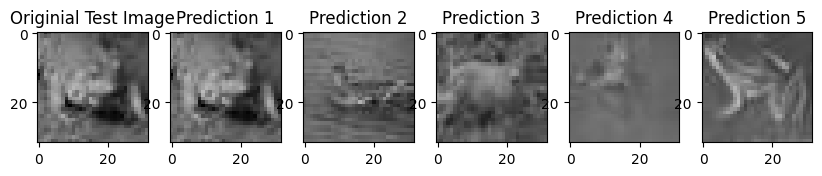

123it [01:56,  1.15it/s]

Originial Test Image 124: 3
Top 5 Predictions:
1: Class 3
2: Class 3
3: Class 7
4: Class 2
5: Class 8




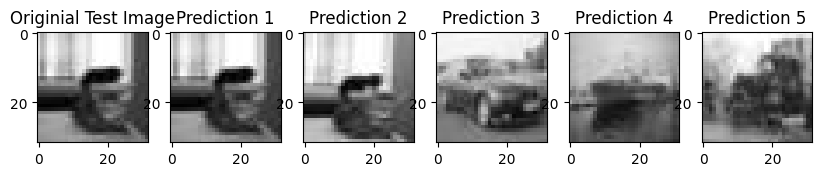

124it [01:57,  1.09it/s]

Originial Test Image 125: 5
Top 5 Predictions:
1: Class 5
2: Class 7
3: Class 1
4: Class 4
5: Class 4




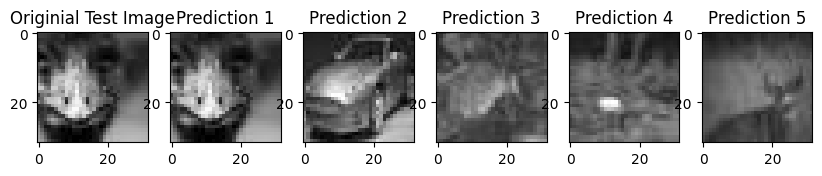

125it [01:58,  1.14it/s]

Originial Test Image 126: 1
Top 5 Predictions:
1: Class 1
2: Class 9
3: Class 3
4: Class 4
5: Class 9




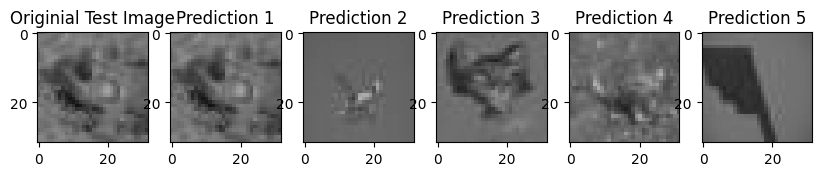

126it [01:59,  1.16it/s]

Originial Test Image 127: 7
Top 5 Predictions:
1: Class 7
2: Class 7
3: Class 2
4: Class 9
5: Class 4




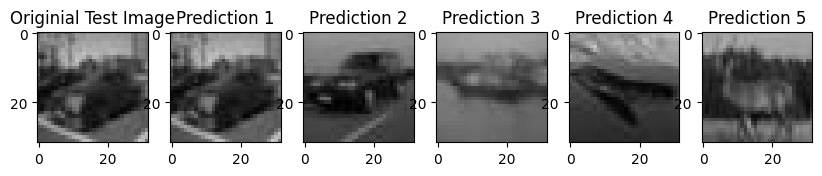

127it [02:00,  1.14it/s]

Originial Test Image 128: 8
Top 5 Predictions:
1: Class 8
2: Class 8
3: Class 7
4: Class 6
5: Class 3




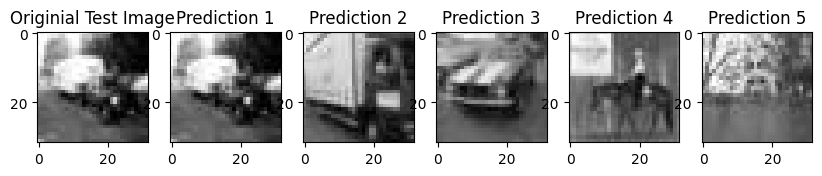

128it [02:01,  1.01it/s]

Originial Test Image 129: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 9
4: Class 5
5: Class 4




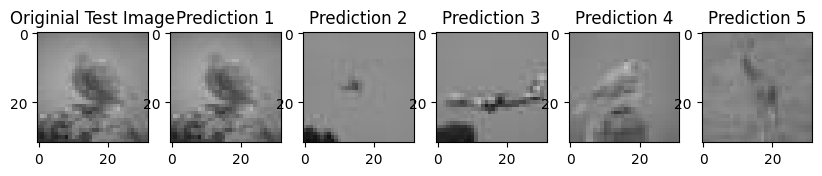

129it [02:03,  1.10s/it]

Originial Test Image 130: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 2
4: Class 5
5: Class 9




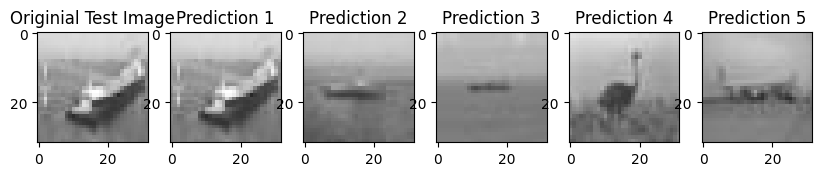

130it [02:04,  1.12s/it]

Originial Test Image 131: 5
Top 5 Predictions:
1: Class 5
2: Class 9
3: Class 5
4: Class 9
5: Class 5




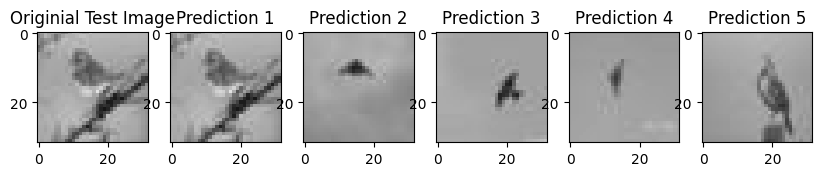

131it [02:05,  1.14s/it]

Originial Test Image 132: 9
Top 5 Predictions:
1: Class 9
2: Class 1
3: Class 9
4: Class 0
5: Class 9




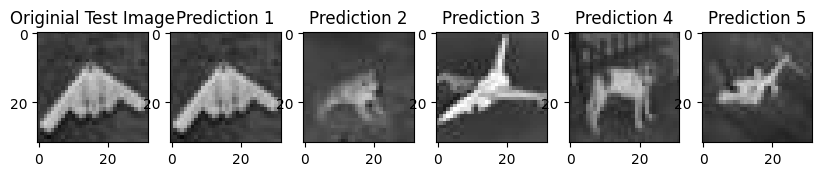

132it [02:06,  1.05s/it]

Originial Test Image 133: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 1
4: Class 9
5: Class 4




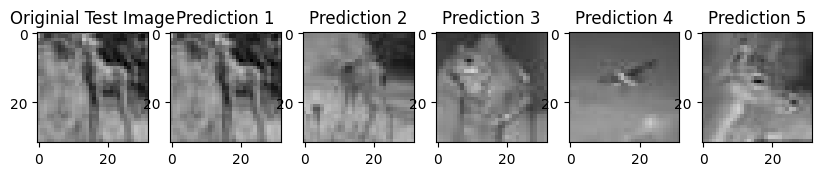

133it [02:07,  1.02it/s]

Originial Test Image 134: 0
Top 5 Predictions:
1: Class 0
2: Class 6
3: Class 7
4: Class 1
5: Class 7




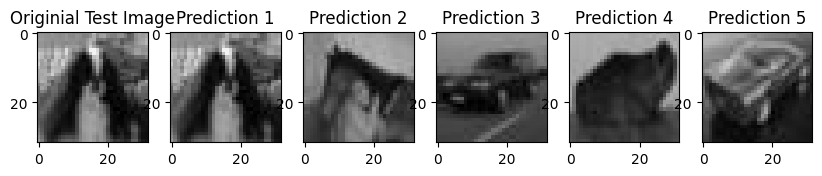

134it [02:07,  1.07it/s]

Originial Test Image 135: 2
Top 5 Predictions:
1: Class 2
2: Class 9
3: Class 5
4: Class 0
5: Class 9




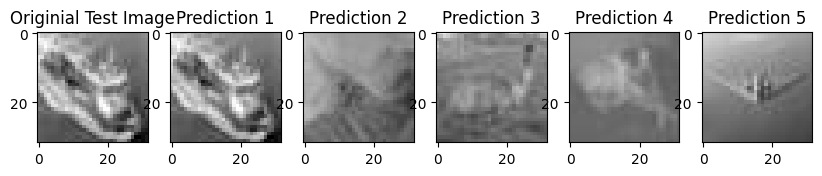

135it [02:08,  1.04it/s]

Originial Test Image 136: 0
Top 5 Predictions:
1: Class 0
2: Class 3
3: Class 9
4: Class 1
5: Class 3




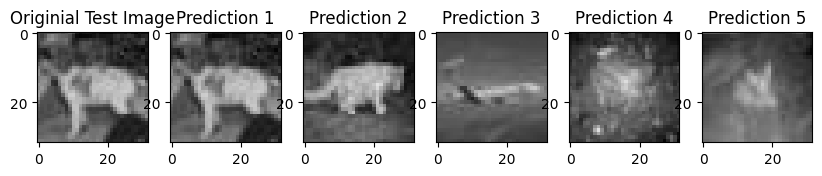

136it [02:09,  1.08it/s]

Originial Test Image 137: 7
Top 5 Predictions:
1: Class 7
2: Class 9
3: Class 9
4: Class 9
5: Class 2




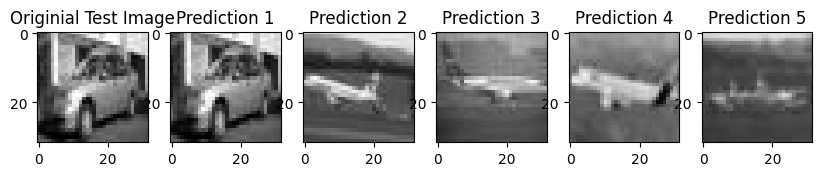

137it [02:10,  1.11it/s]

Originial Test Image 138: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 3
4: Class 9
5: Class 8




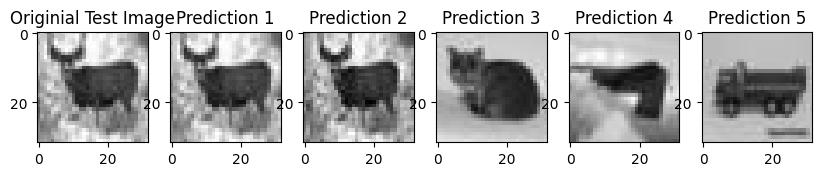

138it [02:11,  1.12it/s]

Originial Test Image 139: 1
Top 5 Predictions:
1: Class 1
2: Class 4
3: Class 1
4: Class 3
5: Class 2




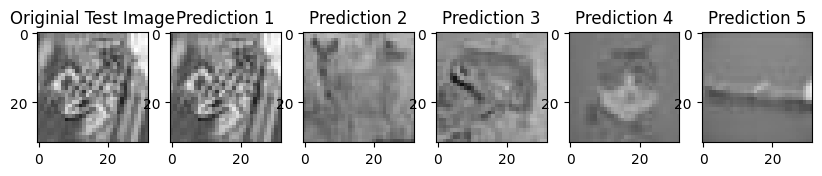

139it [02:12,  1.15it/s]

Originial Test Image 140: 0
Top 5 Predictions:
1: Class 0
2: Class 3
3: Class 0
4: Class 6
5: Class 1




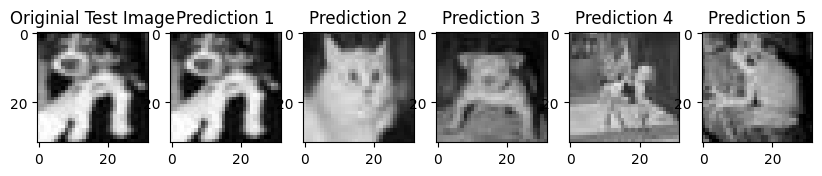

140it [02:13,  1.10it/s]

Originial Test Image 141: 6
Top 5 Predictions:
1: Class 6
2: Class 6
3: Class 8
4: Class 8
5: Class 8




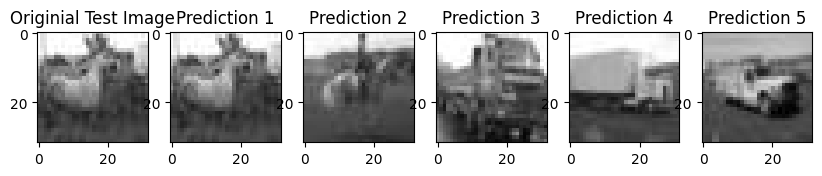

141it [02:14,  1.13it/s]

Originial Test Image 142: 2
Top 5 Predictions:
1: Class 2
2: Class 9
3: Class 5
4: Class 2
5: Class 2




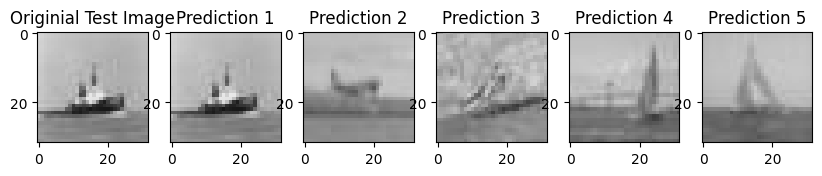

142it [02:14,  1.15it/s]

Originial Test Image 143: 3
Top 5 Predictions:
1: Class 3
2: Class 1
3: Class 5
4: Class 3
5: Class 1




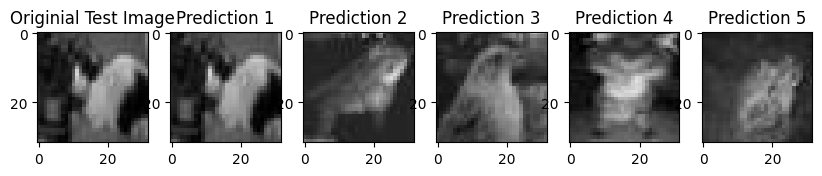

143it [02:15,  1.09it/s]

Originial Test Image 144: 7
Top 5 Predictions:
1: Class 7
2: Class 5
3: Class 3
4: Class 0
5: Class 4




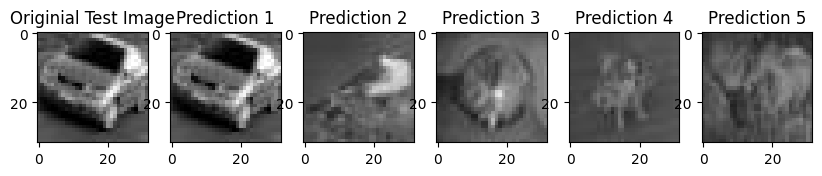

144it [02:17,  1.00it/s]

Originial Test Image 145: 2
Top 5 Predictions:
1: Class 2
2: Class 2
3: Class 1
4: Class 2
5: Class 5




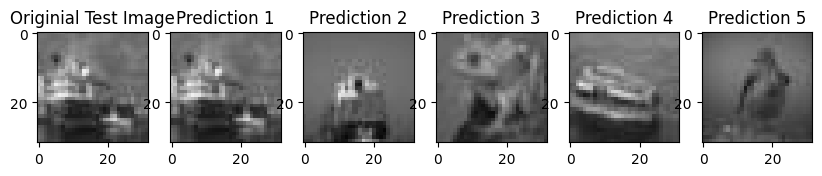

145it [02:18,  1.12s/it]

Originial Test Image 146: 4
Top 5 Predictions:
1: Class 4
2: Class 4
3: Class 0
4: Class 2
5: Class 3




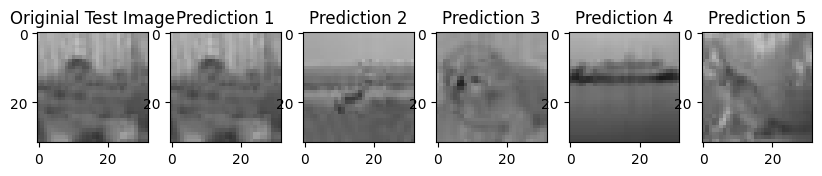

146it [02:19,  1.14s/it]

Originial Test Image 147: 3
Top 5 Predictions:
1: Class 3
2: Class 0
3: Class 0
4: Class 0
5: Class 4




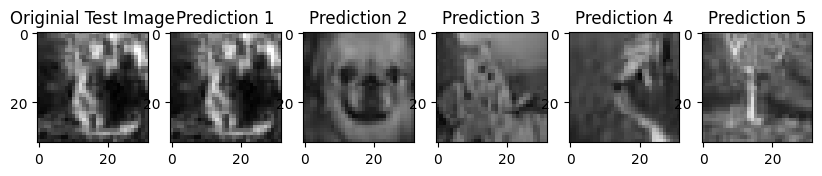

147it [02:20,  1.13s/it]

Originial Test Image 148: 3
Top 5 Predictions:
1: Class 3
2: Class 0
3: Class 3
4: Class 6
5: Class 4




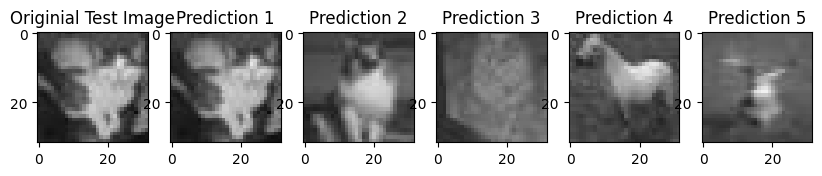

148it [02:21,  1.04s/it]

Originial Test Image 149: 0
Top 5 Predictions:
1: Class 0
2: Class 0
3: Class 0
4: Class 1
5: Class 7




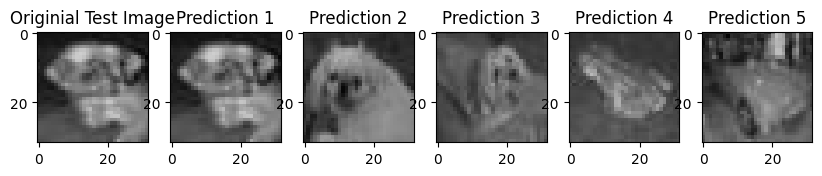

149it [02:22,  1.02it/s]

Originial Test Image 150: 5
Top 5 Predictions:
1: Class 5
2: Class 3
3: Class 9
4: Class 5
5: Class 4




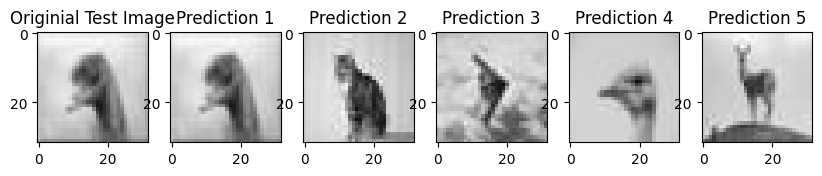

150it [02:23,  1.04it/s]


In [18]:
Z = [item[0] for item in Test_data]
test_images = np.array(Z)

k_values = [1, 3, 5, 7, 9]
# Make predictions using the trained k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
  # Replace with the best hyperparameters
knn_model.fit(X, Y)
predictions = knn_model.predict(test_images)

# Display the top 5 predictions for each test image
for i, test_img in tqdm(enumerate(Test_data)):

    print(f"Originial Test Image {i + 1}: {test_img[1]}")
    print("Top 5 Predictions:")
    distances, indices = knn_model.kneighbors([test_images[i]], n_neighbors=5)
    for j, index in enumerate(indices[0]):
        print(f"{j + 1}: Class {Y[index]}")
    print("\n")

    # Display the test image and its top predictions
    plt.figure(figsize=(10,4))
    plt.subplot(1, 6, 1)
    plt.title("Originial Test Image")
    original_image = test_img[0].reshape(32,32)

    # Display the original image
    plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    for j, index in enumerate(indices[0]):
        plt.subplot(1, 6, j + 2)
        plt.title(f"Prediction {j + 1}")
        # Reshape the flattened image back to (128, 128)
        original_image = X[index].reshape(32,32)
        # Display the original image
        plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    plt.show()